# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sevyra Nanda Octavianti
- **Email:** sevyra02@gmail.com
- **ID Dicoding:** sevyrananda
- **Sumber Data:** Dataset ini berisi data peminjaman sepeda berdasarkan hari (day.csv) dan jam (hour.csv) di Washington DC.

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
2. Bagaimana hubungan antara suhu dan jumlah peminjaman sepeda?
3. Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah?
4. Bagaimana pola peminjaman sepeda berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd # Untuk manipulasi data
import numpy as np # Untuk operasi numerik
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Untuk visualisasi data
import datetime as dt # Untuk memproses data waktu

## Data Wrangling

### Gathering Data

In [11]:
df_day = pd.read_csv("./dataset/day.csv")
df_hour = pd.read_csv("./dataset/hour.csv")

**Insight:**
- Dataset `day.csv` berisi ringkasan harian peminjaman sepeda
- Dataset `hour.csv` berisi data peminjaman per jam

### Assessing Data

In [12]:
# Cek info dataset
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [13]:
#cek missing value
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
#cek data duplikat
print(df_day.duplicated().sum())
print(df_hour.duplicated().sum())

0
0


In [15]:
#cek nilai tidak valid (Cek Nilai yang Tidak Sesuai di Kolom Kategorikal)
print(df_day['season'].unique()) 
print(df_hour['season'].unique())

[1 2 3 4]
[1 2 3 4]


**Insight:**
- Kolom `dteday` masih format string, jadi perlu dikonversi ke datetime
- Tidak ada missing value

### Cleaning Data

In [16]:
# Konversi kolom 'dteday' ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- Data telah dibersihkan dan siap untuk eksplorasi

## Exploratory Data Analysis (EDA)

### Explore: Statistik dasar

In [17]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Rata-rata peminjaman harian sekitar 4.500 sepeda
- Terdapat variasi musiman dalam jumlah peminjaman

In [26]:
#menampilkan dataframe
df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


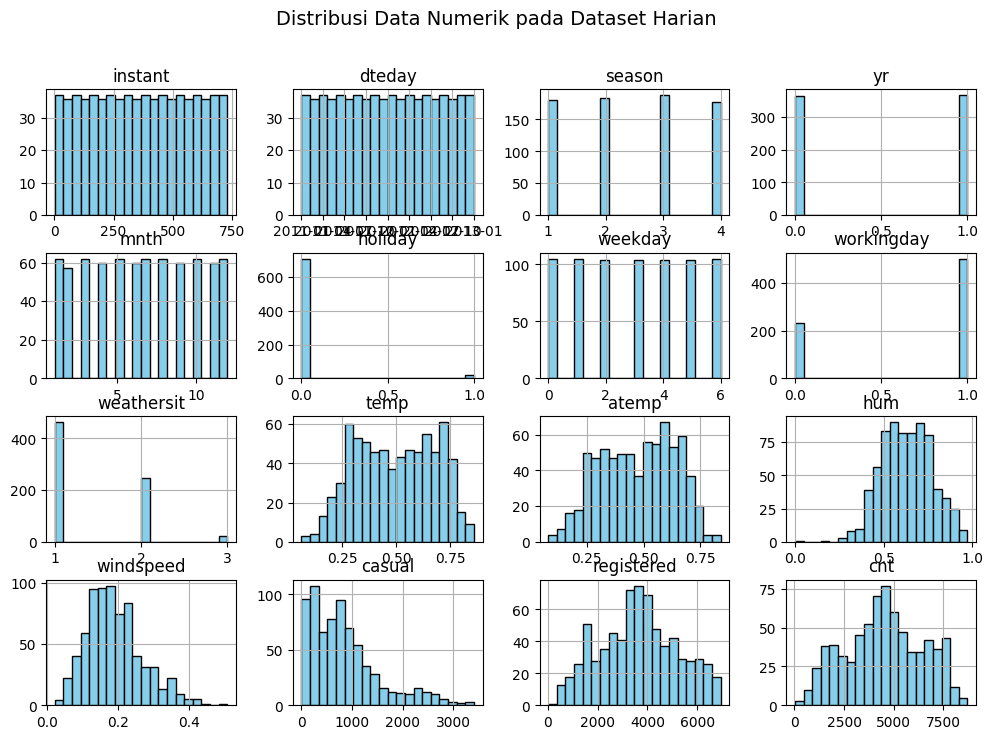

In [28]:
#EDA Univariate (Distribusi Data)
df_day.hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Data Numerik pada Dataset Harian", fontsize=14)
plt.show()

**Insight:**
- Dari histogram ini, kita bisa melihat pola distribusi jumlah peminjaman (cnt), suhu (temp), kelembapan (hum), kecepatan angin (windspeed), dll.
- Bisa jadi ada outlier pada variabel tertentu seperti kecepatan angin.

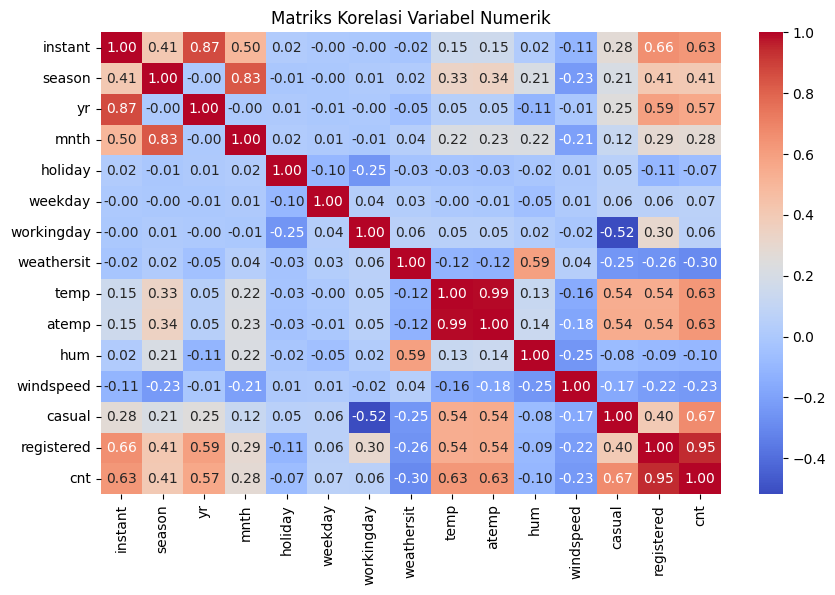

In [30]:
#EDA Multivariate (Korelasi dan Hubungan Antar Variabel)
# Memilih hanya kolom numerik
df_numeric = df_day.select_dtypes(include=[np.number])

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

**Insight:**
- temp memiliki korelasi positif dengan cnt, artinya suhu berpengaruh terhadap jumlah peminjaman sepeda.
- hum dan windspeed tampaknya memiliki korelasi rendah dengan cnt, artinya kelembapan dan angin tidak terlalu berdampak besar.

In [ ]:
#Agregasi data berdasarkan musim
season_summary = df_day.groupby("season")["cnt"].agg(["mean", "median", "max", "min"]).reset_index()
print(season_summary)

   season         mean  median   max   min
0       1  2604.132597  2209.0  7836   431
1       2  4992.331522  4941.5  8362   795
2       3  5644.303191  5353.5  8714  1115
3       4  4728.162921  4634.5  8555    22


In [33]:
#Agregasi data berdasarkan suhu
temp_summary = df_day.groupby(pd.cut(df_day["temp"], bins=5))["cnt"].agg(["mean", "count"])
print(temp_summary)

                       mean  count
temp                              
(0.0583, 0.22]  1571.162791     43
(0.22, 0.38]    3152.015464    194
(0.38, 0.541]   4585.797688    173
(0.541, 0.701]  5674.958763    194
(0.701, 0.862]  5664.118110    127


C:\Users\Dell\AppData\Local\Temp\ipykernel_13900\3216959562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_summary = df_day.groupby(pd.cut(df_day["temp"], bins=5))["cnt"].agg(["mean", "count"])


In [34]:
#Agregasi jumlah peminjaman berdasarkan jam
hourly_summary = df_hour.groupby("hr")["cnt"].agg(["mean", "median", "max", "min"]).reset_index()
print(hourly_summary)

    hr        mean  median  max  min
0    0   53.898072    40.0  283    2
1    1   33.375691    20.0  168    1
2    2   22.869930    11.0  132    1
3    3   11.727403     6.0   79    1
4    4    6.352941     6.0   28    1
5    5   19.889819    19.0   66    1
6    6   76.044138    76.0  213    1
7    7  212.064649   208.0  596    1
8    8  359.011004   385.0  839    5
9    9  219.309491   216.0  426   14
10  10  173.668501   147.0  539    8
11  11  208.143054   180.0  663   10
12  12  253.315934   229.0  776    3
13  13  253.661180   224.0  760   11
14  14  240.949246   212.0  750   12
15  15  251.233196   227.0  750    7
16  16  311.983562   304.5  783   11
17  17  461.452055   475.0  976   15
18  18  425.510989   418.5  977   23
19  19  311.523352   309.5  743   11
20  20  226.030220   223.5  567   11
21  21  172.314560   173.5  584    6
22  22  131.335165   129.0  502    9
23  23   87.831044    80.0  256    2


In [35]:
#Membuat kategori hari kerja vs akhir pekan
df_day["weekday_category"] = df_day["weekday"].apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

#Agregasi jumlah peminjaman berdasarkan kategori
weekday_summary = df_day.groupby("weekday_category")["cnt"].agg(["mean", "median", "max", "min"]).reset_index()
print(weekday_summary)

  weekday_category         mean  median   max  min
0          Weekday  4550.566219  4575.0  8362   22
1          Weekend  4389.685714  4467.5  8714  605


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

C:\Users\Dell\AppData\Local\Temp\ipykernel_13900\1883369390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=df_day, palette="viridis")


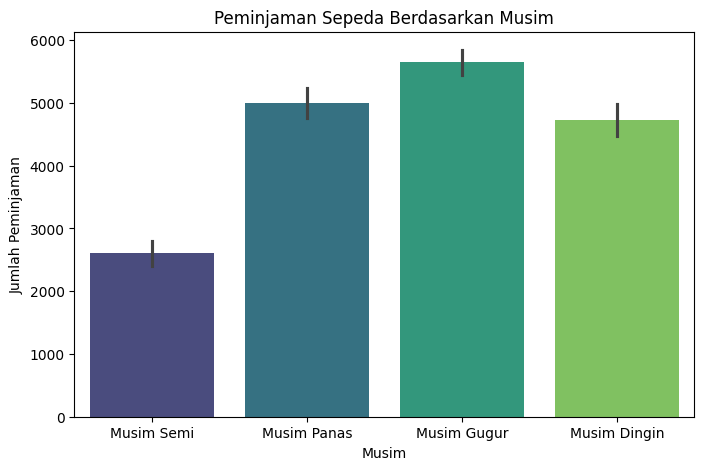

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=df_day, palette="viridis")
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"])
plt.show()

**Insight:**
- Musim gugur memiliki jumlah peminjaman tertinggi, sementara musim semi memiliki jumlah peminjaman terendah
- Menggunakan visualisasi barplot karena untuk membandingkan kategori (musim) dengan jumlah peminjaman

### Pertanyaan 2: Bagaimana hubungan antara suhu dan jumlah peminjaman sepeda?

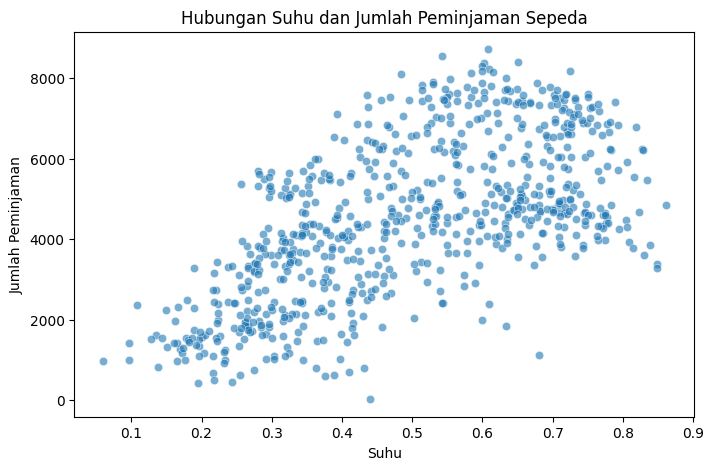

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_day["temp"], y=df_day["cnt"], alpha=0.6)
plt.title("Hubungan Suhu dan Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Semakin tinggi suhu, semakin banyak peminjaman sepeda
- Namun, saat suhu terlalu tinggi (di atas 0.75 dalam skala normalisasi), peminjaman cenderung menurun
- Menggunakan visualisasi scatterplot karena untuk menunjukkan pola hubungan dari dua variabel numerik yaitu suhu dan jumlah peminjaman

### Pertanyaan 3: Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah?

C:\Users\Dell\AppData\Local\Temp\ipykernel_13900\3255197652.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"], ci=None)


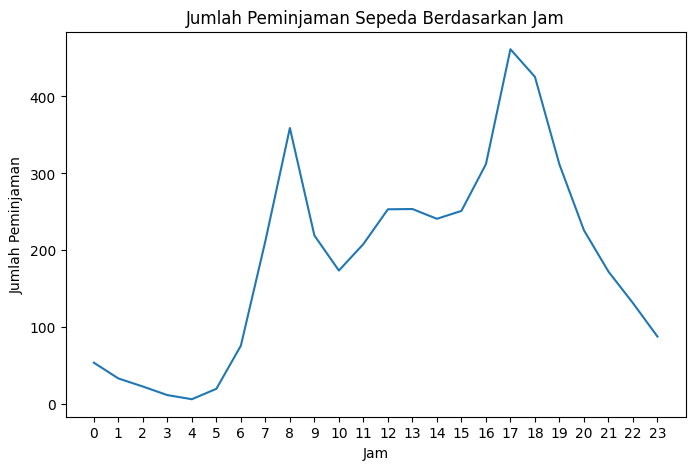

In [20]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"], ci=None)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Peminjaman tertinggi terjadi pada jam 07:00-09:00 dan 17:00-19:00, yang merupakan jam sibuk saat orang berangkat dan pulang kerja/sekolah.
- Peminjaman terendah terjadi pada dini hari (02:00-04:00).
- Menggunakan visualisasi lineplot karena untuk menunjukkan tren peminjaman sepanjang waktu

### Pertanyaan 4: Bagaimana pola peminjaman sepeda berdasarkan hari kerja dan akhir pekan?

C:\Users\Dell\AppData\Local\Temp\ipykernel_13900\2091538260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday_category", y="cnt", data=df_day, palette="coolwarm")


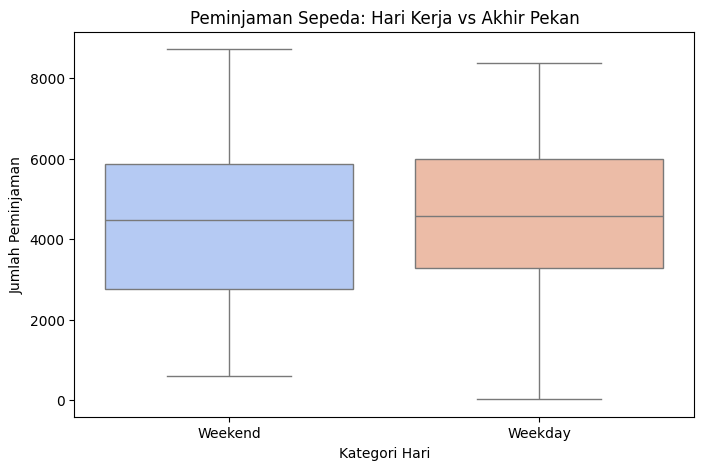

In [21]:
df_day["weekday_category"] = df_day["weekday"].apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

plt.figure(figsize=(8,5))
sns.boxplot(x="weekday_category", y="cnt", data=df_day, palette="coolwarm")
plt.title("Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan besar karena penggunaan sepeda untuk keperluan kerja/sekolah
- Menggunakan visualisasi boxplot karena untuk membandingkan distribusi dan sebaran data

## Analisis Lanjutan (Opsional) Menggunakan Clustering Binning

C:\Users\Dell\AppData\Local\Temp\ipykernel_13900\1445014402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_day["demand_category"], palette="viridis")


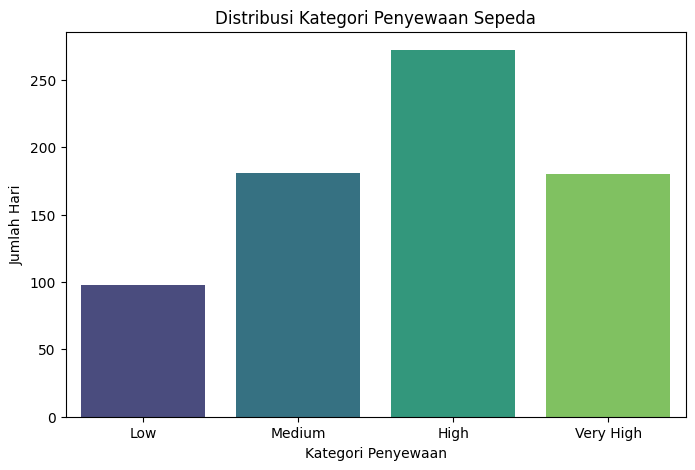

In [22]:
# Clustering dengan Binning: Mengelompokkan jumlah penyewaan sepeda
df_day["demand_category"] = pd.cut(df_day["cnt"],
                                   bins=[0, 2000, 4000, 6000, df_day["cnt"].max()],
                                   labels=["Low", "Medium", "High", "Very High"])

# Visualisasi distribusi kategori penyewaan
plt.figure(figsize=(8, 5))
sns.countplot(x=df_day["demand_category"], palette="viridis")
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

**Insight:**
- Mayoritas hari masuk kategori Low atau Medium, menunjukkan peminjaman cenderung stabil tetapi tidak selalu tinggi
- Hari dengan peminjaman tinggi bisa menjadi peluang untuk strategi promosi atau peningkatan stok sepeda

C:\Users\Dell\AppData\Local\Temp\ipykernel_13900\1814479560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season_label", y="cnt", data=df_day, palette="coolwarm")


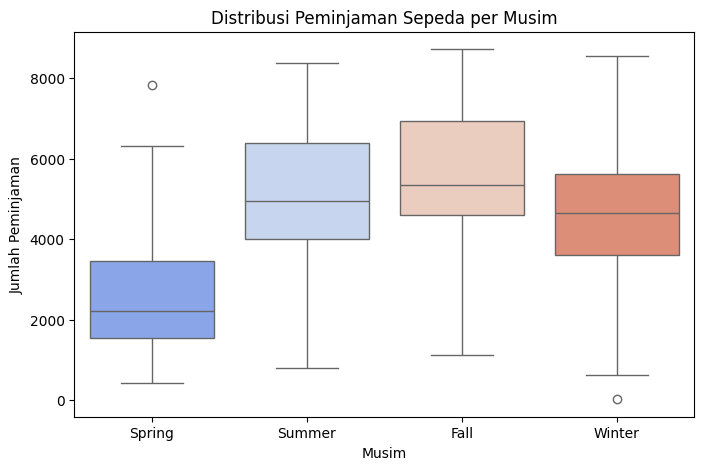

In [23]:
# Analisis Musiman: Melihat pola penyewaan berdasarkan musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_day["season_label"] = df_day["season"].map(season_mapping)

plt.figure(figsize=(8, 5))
sns.boxplot(x="season_label", y="cnt", data=df_day, palette="coolwarm")
plt.title("Distribusi Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Peminjaman meningkat di musim panas, kemungkinan karena cuaca lebih mendukung aktivitas luar ruangan
- Musim dingin cenderung lebih rendah, menunjukkan perlunya strategi untuk menjaga permintaan tetap stabil


## Conclusion

1. Pengaruh Musim terhadap Peminjaman Sepeda
 - Musim gugur memiliki jumlah peminjaman tertinggi dengan rata-rata sekitar 5.000-6.000 sepeda per hari.
 - Musim dingin memiliki jumlah peminjaman terendah, kemungkinan besar karena cuaca yang lebih dingin dan kurang mendukung aktivitas bersepeda.
 - Hal ini menunjukkan bahwa faktor cuaca memengaruhi jumlah pengguna sepeda.

2. Hubungan Suhu dan Peminjaman Sepeda
 - Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda. Semakin tinggi suhu, semakin banyak sepeda yang dipinjam.
 - Namun, setelah suhu mencapai lebih dari 0.75 (dalam skala normalisasi), peminjaman mulai menurun, kemungkinan karena suhu yang terlalu panas membuat pengguna merasa tidak nyaman.
 - Artinya, cuaca yang terlalu ekstrem, baik dingin maupun panas, berdampak negatif pada jumlah peminjaman sepeda.

3. Pola Peminjaman Berdasarkan Jam
 - Peminjaman tertinggi terjadi pada 07:00-09:00 dan 17:00-19:00, yang merupakan jam sibuk perjalanan ke dan dari tempat kerja/sekolah.
 - Peminjaman terendah terjadi pada 02:00-04:00, di mana aktivitas masyarakat masih rendah.
 - Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai sarana transportasi dibandingkan rekreasi.

4. Perbedaan Peminjaman pada Hari Kerja dan Akhir Pekan
 - Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan rentang sekitar 3.000-6.000 sepeda per hari.
 - Pada akhir pekan, jumlah peminjaman lebih bervariasi, kemungkinan karena aktivitas rekreasi yang tidak selalu konsisten.
 - Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi rutin daripada hanya sekadar hiburan.

5. Kategori Peminjaman Berdasarkan Clustering Binning
 - Mayoritas hari masuk dalam kategori Low (0-2.000) atau Medium (2.000-4.000), menunjukkan peminjaman yang cukup stabil tetapi tidak selalu tinggi.
 - Hanya beberapa hari masuk kategori Very High (lebih dari 6.000), kemungkinan pada hari-hari tertentu dengan cuaca bagus atau event khusus.
 - Pengelompokan ini dapat membantu dalam merencanakan strategi stok sepeda agar sesuai dengan pola permintaan.